# 0. Imports

# 1. Treinamento do DS Novato

## Dados sintéticos

In [51]:
# valores dos parâmetros
n_samples = 20000
n_features=2
n_informative=2
n_redundant=0
random_state=123

# dataset
from sklearn import datasets as ds

X, y = ds.make_classification(n_samples=n_samples,
                   n_features=n_features,
                   n_informative=n_informative,
                   n_redundant=n_redundant,
                   random_state=random_state)



In [52]:
type(X)

numpy.ndarray

In [53]:
import pandas as pd

df = pd.DataFrame(X)
df.shape

(20000, 2)

In [54]:
df.head()

,0,1
0,-0.502073,2.663664
1,0.580967,-0.410515
2,0.652334,0.585616
3,2.853186,0.255717
4,-1.258071,-0.995229


In [55]:
# divisão em treino e teste
from sklearn import model_selection as ms

X, X_prod, y, y_prod = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

## Não há separação de dados em treino e teste

In [56]:
# modelo simples - árvore de decisão
from sklearn import tree as tr

model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X,y)

# classificação sobre os dados de treinamento

yhat = model.predict(X)

# calculando a métrica de classificação 
from sklearn import metrics as mt

acc =  mt.accuracy_score(y, yhat)
print('Acurácia sobre o treino: {}'.format(acc))

Acurácia sobre o treino: 1.0


## Publicação do modelo em produção

In [57]:
yhat_prod = model.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print('Acurácia sobre Produção: {}'.format(acc_prod))

Acurácia sobre Produção: 0.8475


_"A acurácia em produção caiu em relação ao treino. Pq Joaquim treinou com toda a base!!!!!"_

## Estratégia Treino-Teste

In [58]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=random_state)

In [59]:
# modelo treinado com dados de treinamento
tr.DecisionTreeClassifier(max_depth=38)
model.fit(X_train, y_train)

# classificacao sobre os dados de teste
yhat_test = model.predict(X_test)
acc_test = mt.accuracy_score(y_test, yhat_test)

print('Acurácia sobre Teste: {}'.format(acc_test))

Acurácia sobre Teste: 0.841875


## Escolha os parâmetros do algoritmo

In [60]:
values = [i for i in range(1, 60)]

test_score = list()
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    
    # classificacao sobre o teste
    yhat_test = model.predict(X_test)
    acc_test = mt.accuracy_score(y_test, yhat_test)
    
    test_score.append(acc_test)

In [61]:
from matplotlib import pyplot as plt

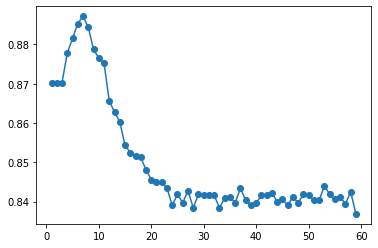

In [62]:
plt.plot(values, test_score, '-o', label='Test')

_Parece que a profundidade da árvore igual a 7 me dá uma maior acurácia. Vamos testar!!!_

## Publicação do algoritmo em produção

In [66]:
# modelo treinado
model_last = tr.DecisionTreeClassifier(max_depth=7, random_state=random_state)

In [67]:
import numpy as np

In [68]:
model_last.fit(np.concatenate((X_train, X_test)),
              np.concatenate((y_train, y_test)))

DecisionTreeClassifier(max_depth=7, random_state=123)

In [69]:
# classificacao sobre os dados de producao
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print('Acurácia sobre produção: {}'.format(acc_prod))

Acurácia sobre produção: 0.8835


_Apesar de ter melhorado a acurácia, pode ter havido um vazamento de dados porque os dados foram usados várias vezes para cada valor de parâmetro, além disso, o modelo final junta valores de treino teste que auxiliaram na escolha do "melhor" parâmetro. Isso acontece muito, principalmente quando não há muitos dados._

# 2. Estratégia de Treino-Validação-Teste

In [70]:
# Separação entre treino e validação
X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

In [71]:
values = [i for i in range(1, 60)]

val_score = list()
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    
    # classificacao sobre a validação
    yhat_val = model.predict(X_val)
    acc_val = mt.accuracy_score(y_val, yhat_val)
    
    val_score.append(acc_val)

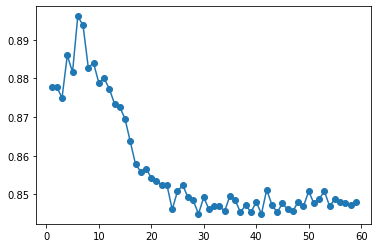

In [72]:
plt.plot(values, val_score, '-o', label='Validation')

In [73]:
 # classificacao sobre a validação
model = tr.DecisionTreeClassifier(max_depth=6, random_state=random_state) 
model.fit(X_train, y_train)


yhat_val = model.predict(X_val)
acc_val = mt.accuracy_score(y_val, yhat_val)

print('Acurácia sobre validação: {}'.format(acc_val))

Acurácia sobre validação: 0.89609375


- Vamos medir agora a capacidade de generalização do modelo para dados que ele nunca viu, ou seja, os dados de teste.
- No modelo final eu vou juntar os dados de treino e validação, porque o algoritmo já viu.

In [74]:
model_last = tr.DecisionTreeClassifier(max_depth=6, random_state=random_state)
model_last.fit(np.concatenate((X_train, X_val)),
               np.concatenate((y_train, y_val)))

DecisionTreeClassifier(max_depth=6, random_state=123)

In [75]:
# classificação sobre os dados de teste
yhat_test = model_last.predict(X_test)

In [76]:
acc_test = mt.accuracy_score(y_test, yhat_test)
print('Acurácia sobre o teste: {}'.format(acc_test))

Acurácia sobre o teste: 0.8853125


- Olhando agora para os dados de produção:

In [79]:
# classificação sobre os dados em produção
yhat_prod = model_last.predict(X_prod)
acc_prod = mt.accuracy_score(y_prod, yhat_prod)
print('Acurácia sobre produção: {}'.format(acc_prod))

Acurácia sobre produção: 0.888


- Tem que dá muito próxima do valor no teste, e está coerente!!! 